# Machine learning: Coputer vision

In [1]:
from scipy.misc import imread, imsave, imresize
import imageio
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import time

# helpers, nothing interesting inside
from cs231nlib.utils import load_CIFAR10;
from cs231nlib.utils import visualize_CIFAR;

print("Hellow world")

OPTIMIZE_TR = 5000
OPTIMIZE_TEST = 1000

Hellow world


### What is vision?

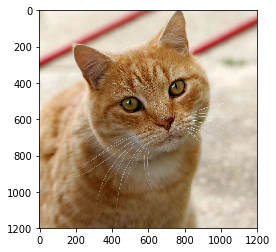

shape: uint8 (1199, 1200, 3)
total numbers: 4316400
first 100 elements from the list [218 209 176 217 208 175 216 207 174 217 208 177 220 211 180 221 212 181
 220 213 184 220 213 184 219 212 184 220 213 185 220 213 187 220 214 188
 221 215 191 222 216 192 222 216 192 223 217 193 225 218 189 225 218 190
 226 219 191 227 220 194 229 221 198 232 224 203 233 225 206 235 226 209
 232 223 208 233 224 209 233 224 209 234 225 210 235 226 209 236 227 210
 237 228 211 238 230 211 238 229 214 239]


In [2]:
img = imageio.imread('assets/cat.jpg')

plt.imshow(img)
plt.show()

print("shape:", img.dtype, img.shape)
print("total numbers:", np.prod(np.array(img.shape)))

print("first 100 elements from the list", img.flatten()[:100])

### What do you see?

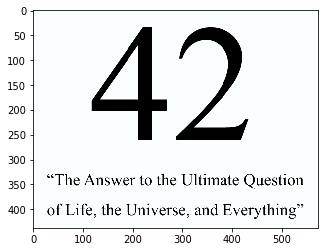

In [3]:
def what_is_this(img):
    plt.imshow(imageio.imread('assets/42_Answer.jpg'))
    plt.show()
    
what_is_this(img)

### Define answers space

In [4]:
answers = ['cat', 'dog', 'man']

The task in Image Classification is to predict a single label for a given image. Images are 3-dimensional arrays of integers from 0 to 255, of size Width x Height x 3. The 3 represents the three color channels Red, Green, Blue.

### Challenges

![title](assets/challenges.jpeg)

### Data-driven approach: Input -> Learning -> Evaluation

Example image classification dataset: CIFAR-10. One popular toy image classification dataset is the CIFAR-10 dataset. This dataset consists of 60,000 tiny images that are 32 pixels high and wide. Each image is labeled with one of 10 classes (for example “airplane, automobile, bird, etc”). These 60,000 images are partitioned into a training set of 50,000 images and a test set of 10,000 images. In the image below you can see 10 random example images from each one of the 10 classes:

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


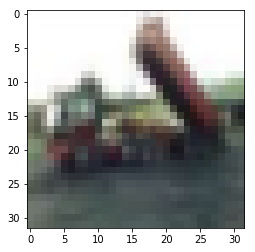

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


def unpickle(file):
 '''Load byte data from file'''
 with open(file, 'rb') as f:
  data = pickle.load(f, encoding='latin-1')
  return data


def load_cifar10_data(data_dir):
 '''Return train_data, train_labels, test_data, test_labels
 The shape of data is 32 x 32 x3'''
 train_data = None
 train_labels = []

 for i in range(1, 6):
  data_dic = unpickle(data_dir + "/data_batch_{}".format(i))
  if i == 1:
   train_data = data_dic['data']
  else:
   train_data = np.vstack((train_data, data_dic['data']))
  train_labels += data_dic['labels']

 test_data_dic = unpickle(data_dir + "/test_batch")
 test_data = test_data_dic['data']
 test_labels = test_data_dic['labels']

 train_data = train_data.reshape((len(train_data), 3, 32, 32))
 train_data = np.rollaxis(train_data, 1, 4)
 train_labels = np.array(train_labels)

 test_data = test_data.reshape((len(test_data), 3, 32, 32))
 test_data = np.rollaxis(test_data, 1, 4)
 test_labels = np.array(test_labels)

 return train_data, train_labels, test_data, test_labels

data_dir = 'data/CIFAR10'

train_data, train_labels, test_data, test_labels = load_cifar10_data(data_dir)

print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

# In order to check where the data shows an image correctly
plt.imshow(train_data[2])
plt.show()

In [6]:
## load dataset

#Xtr, Ytr, Xte, Yte=load_CIFAR10("data/CIFAR10");
Xtr, Ytr, Xte, Yte=load_cifar10_data(data_dir)

print(Xtr.shape[0])
print(Xtr.shape[1])
print(Xtr.shape[2])
print(Xtr.shape[3])

# flatten out all images to be one-dimensional
Xtr_rows = Xtr.reshape(Xtr.shape[0], 32 * 32 * 3) # Xtr_rows becomes 50000 x 3072
Xte_rows = Xte.reshape(Xte.shape[0], 32 * 32 * 3) # Xte_rows becomes 10000 x 3072
    


50000
32
32
3


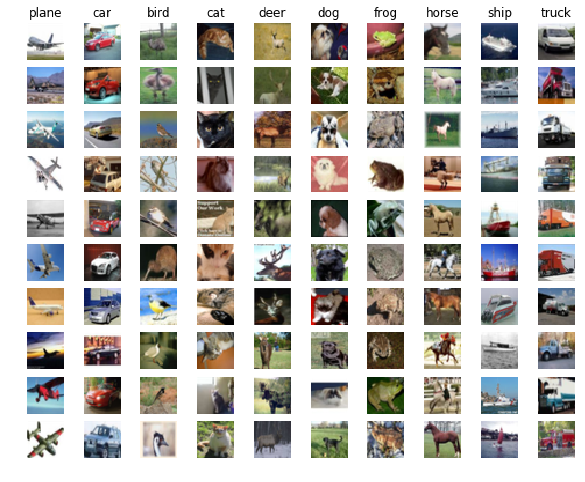

In [7]:
## plot configuration

plt.rcParams['figure.figsize']=(10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

visualize_CIFAR(X_train=Xtr, y_train=Ytr, samples_per_class=10)


def show_image(class_id = 3):
    cat_id = None
    for pos, y in enumerate(Ytr):
        if y == class_id:
            cat_id = pos
            print(cat_id, y)
            break

    plt.figure(figsize=(2,2))
    plt.imshow(Xtr[cat_id].astype('uint8'))
    plt.show()

### Random

In [8]:
class RandomGuess(object):
    def __init__(self):
        pass

    def train(self, X, y):
        self.Xtr = X
        self.ytr = y

    def predict(self, X):
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        # loop over all test rows
        for i in range(num_test):
            Ypred[i] = randint(0, 9)

        return Ypred

In [9]:
rg = RandomGuess() # create a Random guess classifier class
rg.train(Xtr, Ytr) # train the classifier on the training images and labels

Yte_predict = rg.predict(Xte) # predict labels on the test images

# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print('accuracy: %f' % ( np.mean(Yte_predict == Yte) ))

accuracy: 0.098800


###  Nearest Neighbor Classifier

<br>
<center>$d_1 (I_1, I_2) = \sum_{p} \left| I^p_1 - I^p_2 \right|$</center>
<br>
<br>

***

![title](assets/nneg.jpeg)

In [10]:
class NearestNeighbor(object):
    def __init__(self):
        pass

    def train(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        # the nearest neighbor classifier simply remembers all the training data
        self.Xtr = X
        self.ytr = y

    def predict(self, X):
        """ X is N x D where each row is an example we wish to predict label for """
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        # loop over all test rows
        for i in range(num_test):
            # find the nearest training image to the i'th test image
            # using the L1 distance (sum of absolute value differences)
            distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)          
            min_index = np.argmin(distances) # get the index with smallest distance
            Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

        return Ypred

In [11]:
def test_NearestNeighbor(Xtr_rows, Ytr, Xte_rows, Yte):    
    nn = NearestNeighbor() # create a Nearest Neighbor classifier class
    nn.train(Xtr_rows, Ytr) # train the classifier on the training images and labels

    Yte_predict = nn.predict(Xte_rows) # predict labels on the test images

    # and now print the classification accuracy, which is the average number
    # of examples that are correctly predicted (i.e. label matches)
    print('accuracy: %f' % ( np.mean(Yte_predict == Yte) ))
    
print(time.strftime('%X'))    
test_NearestNeighbor(Xtr_rows[:OPTIMIZE_TR], Ytr[:OPTIMIZE_TR], Xte_rows[:OPTIMIZE_TEST], Yte[:OPTIMIZE_TEST])
print(time.strftime('%X'))

17:08:25
accuracy: 0.213000
17:08:58


### k - Nearest Neighbor Classifier
<br>
Instead of finding the single closest image in the training set, we will find the top k closest images, and have them vote on the label of the test image. Leading to better generalization on the test data
![title](assets/knn.jpeg)

What is the best K? Hyperparameter tuning idea.

Split your training set into training set and a validation set. Use validation set to tune all hyperparameters. At the end run a single time on the test set and report performance.

In [12]:
class KNearestNeighbor(object):
    def __init__(self):
        pass

    def train(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        # the nearest neighbor classifier simply remembers all the training data
        self.Xtr = X
        self.ytr = y    
    
    def predict(self, X, k=10):
        """ X is N x D where each row is an example we wish to predict label for """
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        # loop over all test rows
        for i in range(num_test):
            # find the nearest training image to the i'th test image
            # using the L1 distance (sum of absolute value differences)
            distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)  
            
            list_of_indexes = []
            for k_item in range(k):
                min_index = np.argmin(distances)
                list_of_indexes.append(min_index)
                
                # do not use this index anymore
                distances[min_index] = distances[np.argmax(distances)]
                
            classes = []
            for min_index in list_of_indexes:
                classes.append(self.ytr[min_index])

            Ypred[i] = np.bincount(classes).argmax()

        return Ypred

In [13]:
def find_k_KNearestNeighbor(Xtr_rows, Ytr, Xte_rows, Yte):
    # find hyperparameters that work best on the validation set
    for k in [1, 3, 5, 10, 20, 50, 100]:  
        # use a particular value of k and evaluation on validation data
        nn = KNearestNeighbor()
        nn.train(Xtr_rows, Ytr)
        # here we assume a modified NearestNeighbor class that can take a k as input
        Yval_predict = nn.predict(X = Xte_rows, k = k)
        acc = np.mean(Yval_predict == Yte)
        print('K value:', k)
        print('accuracy: %f' % (acc,))
        
find_k_KNearestNeighbor(Xtr_rows[:OPTIMIZE_TR], Ytr[:OPTIMIZE_TR], Xte_rows[:OPTIMIZE_TEST], Yte[:OPTIMIZE_TEST])

K value: 1
accuracy: 0.213000
K value: 3
accuracy: 0.194000
K value: 5
accuracy: 0.203000
K value: 10
accuracy: 0.204000
K value: 20
accuracy: 0.203000
K value: 50
accuracy: 0.189000
K value: 100
accuracy: 0.177000


In [14]:
def test_k_KNearestNeighbor(Xtr_rows, Ytr, Xte_rows, Yte, k=1):    
    nn = KNearestNeighbor() # create a Nearest Neighbor classifier class
    nn.train(Xtr_rows, Ytr) # train the classifier on the training images and labels

    Yte_predict = nn.predict(X = Xte_rows, k = k) # predict labels on the test images

    # and now print the classification accuracy, which is the average number
    # of examples that are correctly predicted (i.e. label matches)
    print('accuracy: %f' % ( np.mean(Yte_predict == Yte) ))
        
test_k_KNearestNeighbor(Xtr_rows[:OPTIMIZE_TR], Ytr[:OPTIMIZE_TR], Xte_rows[:OPTIMIZE_TEST], Yte[:OPTIMIZE_TEST], k=20)

accuracy: 0.203000


#### Disadvantages:
1) The classifier must remember all of the training data and store it for future comparisons with the test data. This is space inefficient because datasets may easily be gigabytes in size.

2) Classifying a test image is expensive since it requires a comparison to all training images.

## Linear Classification
Score function - that maps the raw data to class scores

Loss function - that quantifies the agreement between the predicted scores and the ground truth labels

Objective - optimization problem in which we will minimize the loss function with respect to the parameters of the score function

### Score function

<br>
<center>$f(x_i, W, b) =  W x_i + b$</center>
<br>

***

![title](assets/imagemap.jpg)


Analogy of images as high-dimensional points. Since the images are stretched into high-dimensional column vectors, we can interpret each image as a single point in this space (e.g. each image in CIFAR-10 is a point in 3072-dimensional space of 32x32x3 pixels). Analogously, the entire dataset is a (labeled) set of points.

![title](assets/pixelspace.jpeg)

***
Interpretation of linear classifiers as template matching.
![title](assets/templates.jpg)

### Bias trick (skip)

$f(x_i, W, b) =  W x_i + b$ change to $f(x_i, W) =  W x_i$


With our CIFAR-10 example, xi is now [3073 x 1] instead of [3072 x 1] - (with the extra dimension holding the constant 1), and WW is now [10 x 3073] instead of [10 x 3072]. The extra column that W now corresponds to the bias b

![title](assets/wb.jpeg)

### Loss function: SVM
Multiclass Support Vector Machine: SVM “wants” the correct class for each image to a have a score higher than the incorrect classes by some fixed margin Δ.

<center>$L_i = \sum_{j\neq y_i} \max(0, s_j - s_{y_i} + \Delta)$</center>

Example. Lets unpack this with an example to see how it works. Suppose that we have three classes that receive the scores s=[13,−7,11], and that the first class is the true class (i.e. yi=0). Also assume that Δ (a hyperparameter we will go into more detail about soon) is 10. The expression above sums over all incorrect classes (j≠yi), so we get two terms:

$L_i = \max(0, -7 - 13 + 10) + \max(0, 11 - 13 + 10)$

You can see that the first term gives zero since [-7 - 13 + 10] gives a negative number, which is then thresholded to zero with the max(0,−) function. We get zero loss for this pair because the correct class score (13) was greater than the incorrect class score (-7) by at least the margin 10. In fact the difference was 20, which is much greater than 10 but the SVM only cares that the difference is at least 10; Any additional difference above the margin is clamped at zero with the max operation. The second term computes [11 - 13 + 10] which gives 8. That is, even though the correct class had a higher score than the incorrect class (13 > 11), it was not greater by the desired margin of 10. The difference was only 2, which is why the loss comes out to 8 (i.e. how much higher the difference would have to be to meet the margin). In summary, the SVM loss function wants the score of the correct class yi to be larger than the incorrect class scores by at least by Δ (delta). If this is not the case, we will accumulate loss.

In [15]:
def L_i_vectorized(x, y, W):
    """
    A faster half-vectorized implementation. half-vectorized
    refers to the fact that for a single example the implementation contains
    no for loops, but there is still one loop over the examples (outside this function)
    """
    delta = 1.0
    scores = W.dot(x)
    # compute the margins for all classes in one vector operation
    margins = np.maximum(0, scores - scores[y] + delta)
    # on y-th position scores[y] - scores[y] canceled and gave delta. We want
    # to ignore the y-th position and only consider margin on max wrong class
    margins[y] = 0
    loss_i = np.sum(margins)
    return loss_i

def L(X, y, W):
    """
    fully-vectorized implementation :
    - X holds all the training examples as columns (e.g. 3073 x 50,000 in CIFAR-10)
    - y is array of integers specifying correct class (e.g. 50,000-D array)
    - W are weights (e.g. 10 x 3073)
    """
    
    loss = np.zeros(X.shape)
    
    for i in range(len(loss)):
        loss_i = L_i_vectorized(X[i], y[i], W)
        loss[i] = loss_i
        
    return np.sum(loss)

### Regularization (skip)

Suppose that we have a dataset and a set of parameters W that correctly classify every example. The issue is that this set of W is not necessarily unique: there might be many similar W that correctly classify the examples. One easy way to see this is that if some parameters W correctly classify all examples (so loss is zero for each example), then any multiple of these parameters λW where λ>1 will also give zero loss because this transformation uniformly stretches all score magnitudes and hence also their absolute differences.

<br> 
<center>$R(W) = \sum_k\sum_l W_{k,l}^2$<center>
<br>    
    
The most appealing property is that penalizing large weights tends to improve generalization, because it means that no input dimension can have a very large influence on the scores all by itself. For example, suppose that we have some input vector x=[1,1,1,1] and two weight vectors w1=[1,0,0,0], w2=[0.25,0.25,0.25,0.25]. Then wT1x=wT2x=1 so both weight vectors lead to the same dot product, but the L2 penalty of w1 is 1.0 while the L2 penalty of w2 is only 0.25

<br> 
<center>$L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \lambda R(W) }_\text{regularization loss} \\\\
$<center>
<br> 

### Softmax classifier  (skip)

In the Softmax classifier, the function mapping f(xi;W)=Wxi stays unchanged, but we now interpret these scores as the unnormalized log probabilities for each class and replace the hinge loss with a cross-entropy loss that has the form:

<center>$L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in}$<center>
    
    
$f_j(z) = \frac{e^{z_j}}{\sum_k e^{z_k}}$ : softmax function. It takes a vector of arbitrary real-valued scores (in z) and squashes it to a vector of values between zero and one that sum to one.

In [16]:
f = np.array([1, 3, 1])
p = np.exp(f) / np.sum(np.exp(f))
print(p)
print(np.sum(p))
print(-np.log(p))

[ 0.10650698  0.78698604  0.10650698]
1.0
[ 2.23954477  0.23954477  2.23954477]


### Big numbers

In [17]:
f = np.array([123, 456, 789]) # example with 3 classes and each having large scores
# p = np.exp(f) / np.sum(np.exp(f)) # Bad: Numeric problem, potential blowup

# instead: first shift the values of f so that the highest number is 0:
f -= np.max(f) # f becomes [-666, -333, 0]
p = np.exp(f) / np.sum(np.exp(f)) # safe to do, gives the correct answer

print(p)
print(np.sum(p))

[  5.75274406e-290   2.39848787e-145   1.00000000e+000]
1.0


### Optimization

we can generate a random weight matrix W (which corresponds to a single point in the space), then march along a ray and record the loss function value along the way. That is, we can generate a random direction W_1 and compute the loss along this direction by evaluating L(W + a W_1) for different values of a. This process generates a simple plot with the value of a as the x-axis and the value of the loss function as the y-axis. We can also carry out the same procedure with two dimensions by evaluating the loss L(W + a W_1 + b W_2) as we vary a, b. In a plot, a, b could then correspond to the x-axis and the y-axis, and the value of the loss function can be visualized with a color:


![title](assets/loss_chart.png)

### Strategy #1: A first very bad idea solution: Random search

In [46]:
class LinearClassification(object):
    def __init__(self):
        pass

    def train_random(self, X, y):
        W = np.random.randn(10, 3072) * 0.0001 # randon weights
        bestloss = float("inf") # Python assigns the highest possible float value
        for i in range(10):
            Wtry = np.random.randn(10, 3072) * 0.0001 # generate random parameters
            loss = L(Xtr_rows, Ytr, Wtry) # get the loss over the entire training set
            if loss < bestloss: # keep track of the best solution
                W = Wtry
                bestloss = loss       
            print('iter %d loss is %f' % (i, bestloss))
            
        self.W_final = W
        self.loss_final = bestloss
        
    def train(self, X, y):
        W = np.random.randn(10, 3072) * 0.0001 # randon weights
        bestloss = float("inf") # Python assigns the highest possible float value
        for i in range(10):
            step_size = 0.00001
            Wtry = W + np.random.randn(10, 3072) * step_size
            loss = L(Xtr_rows, Ytr, Wtry)
            if loss < bestloss:
                W = Wtry
                bestloss = loss       
            print('iter %d loss is %f' % (i, bestloss))
        
        self.W_final = W
        self.loss_final = bestloss

    def predict(self, X):
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test)

        # loop over all test rows
        for i in range(num_test):
            scores = self.W_final.dot(X[i])
            max_index = np.argmax(scores)
            Ypred[i] = max_index

        return Ypred

In [47]:
rg = LinearClassification() # create a Random guess classifier class
rg.train_random(Xtr_rows, Ytr) # train the classifier on the training images and labels

Yte_predict = rg.predict(Xte_rows) # predict labels on the test images

# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print('accuracy: %f' % ( np.mean(Yte_predict == Yte) ))

iter 0 loss is 1464094098.369262
iter 1 loss is 1464094098.369262
iter 2 loss is 1464094098.369262
iter 3 loss is 1464094098.369262
iter 4 loss is 1422804869.418094
iter 5 loss is 1422804869.418094
iter 6 loss is 1422804869.418094
iter 7 loss is 1422804869.418094
iter 8 loss is 1422804869.418094
iter 9 loss is 1422804869.418094
accuracy: 0.068800


### Strategy #2: Random Local Search

In [48]:
rg = LinearClassification() # create a Random guess classifier class
rg.train(Xtr_rows, Ytr) # train the classifier on the training images and labels

Yte_predict = rg.predict(Xte_rows) # predict labels on the test images

# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print('accuracy: %f' % ( np.mean(Yte_predict == Yte) ))

iter 0 loss is 1592117538.252740
iter 1 loss is 1589985761.838539
iter 2 loss is 1589985761.838539
iter 3 loss is 1582374642.497709
iter 4 loss is 1582374642.497709
iter 5 loss is 1579818601.478548
iter 6 loss is 1558814861.813393
iter 7 loss is 1558814861.813393
iter 8 loss is 1537522841.490297
iter 9 loss is 1537522841.490297
accuracy: 0.096600


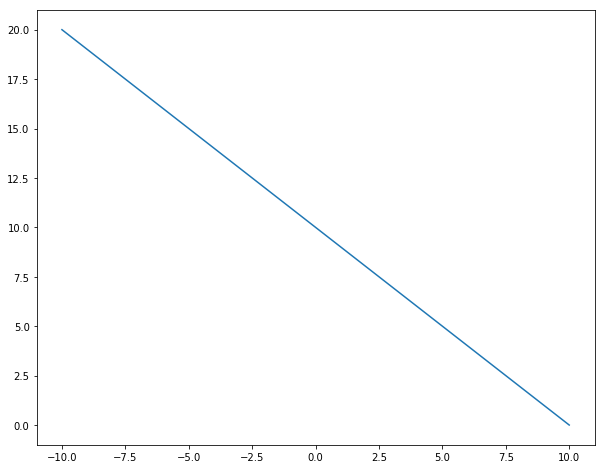

In [34]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  

def my_formula(x):
    return 10 - x

graph(my_formula, range(-10, 11))

### Strategy #3: Following the Gradient

<br><center>$\frac{df(x)}{dx} = \lim_{h\ \to 0} \frac{f(x + h) - f(x)}{h}$</center><br>


![title](assets/gradient.png)

In [36]:
def eval_numerical_gradient(f, x):
    """ 
    a naive implementation of numerical gradient of f at x 
    - f should be a function that takes a single argument
    - x is the point (numpy array) to evaluate the gradient at
    """ 

    fx = f(x) # evaluate function value at original point
    grad = np.zeros(x.shape)
    h = 0.00001

    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        old_value = x[ix]
        x[ix] = old_value + h # increment by h
        fxh = f(x) # evalute f(x + h)
        x[ix] = old_value # restore to previous value (very important!)

        # compute the partial derivative
        grad[ix] = (fxh - fx) / h # the slope
        it.iternext() # step to next dimension

    return grad

In [37]:
# to use the generic code above we want a function that takes a single argument
# (the weights in our case) so we close over X_train and Y_train
def CIFAR10_loss_fun(W):
    data_batch = np.random.choice(len(Xtr_rows), 256, replace=False)
    
    return L(Xtr_rows[data_batch], Ytr[data_batch], W)

In [ ]:
weights = np.random.rand(10, 3072) * 0.001
step_size = 0.00000001
for i in range(1000):
    
    print(time.strftime('%X'))
    print('gradient', i)
    df = eval_numerical_gradient(CIFAR10_loss_fun, weights) 
    weights += - step_size * df

    num_test = 5000
    Ypred = np.zeros(num_test)
    for i in range(num_test):
        scores = weights.dot(Xte_rows[i])
        max_index = np.argmax(scores)
        Ypred[i] = max_index

    print('accuracy: %f' % ( np.mean(Ypred == Yte[:num_test]) ))
    
    

18:34:15
gradient 0
accuracy: 0.089800
18:39:10
gradient 1
accuracy: 0.094600
18:44:01
gradient 2
accuracy: 0.090800
18:48:54
gradient 3
accuracy: 0.095800
18:53:39
gradient 4
accuracy: 0.105400
18:58:25
gradient 5
accuracy: 0.101400
19:03:21
gradient 6


### Computing the gradient analytically with Calculus (skip)

$L_i = \sum_{j\neq y_i} \left[ \max(0, w_j^Tx_i - w_{y_i}^Tx_i + \Delta) \right]$

$\nabla_{w_{y_i}} L_i = - \left( \sum_{j\neq y_i} \mathbb{1}(w_j^Tx_i - w_{y_i}^Tx_i + \Delta > 0) \right) x_i$

$\nabla_{w_j} L_i = \mathbb{1}(w_j^Tx_i - w_{y_i}^Tx_i + \Delta > 0) x_i$

In [50]:
def eval_gradient_analytically(x, y, W):
    grad = np.zeros(x.shape)
    
    delta = 1.0
    scores = W.dot(x)
    margins = scores - scores[y] + delta
    
    n = 0
    for i in range(len(margins)):
        if i == y:
            continue
        
        if margins[i] > 0:
            n += 1          
    grad_yi = -n * x # [12....3042]
    
    n = np.zeros(10)
    for i in range(len(margins)):        
        if margins[i] > 0:
            n[i]= 1     
        else:
            n[i]= 0
            
    grad = np.reshape(n, (10, 1)) * x
    
    grad[y] = grad_yi
    
    return grad

In [51]:
weights = np.random.rand(10, 3072) * 0.001
step_size = 0.000000001
for i in range(10000):

    item = randint(0, len(Ytr))
    df = eval_gradient_analytically(Xtr_rows[item], Ytr[item], weights)
    weights += - step_size * df
    
    # test results:
    num_test = 5000
    Ypred = np.zeros(num_test)
    for i in range(num_test):
        scores = weights.dot(Xte_rows[i])
        max_index = np.argmax(scores)
        Ypred[i] = max_index

    print('accuracy: %f' % ( np.mean(Ypred == Yte[:num_test]) ))

accuracy: 0.087400
accuracy: 0.088000
accuracy: 0.088000
accuracy: 0.088000
accuracy: 0.088400
accuracy: 0.088400
accuracy: 0.087200
accuracy: 0.088000
accuracy: 0.088200
accuracy: 0.088400
accuracy: 0.088400
accuracy: 0.088400
accuracy: 0.088400
accuracy: 0.088400
accuracy: 0.088200
accuracy: 0.088200
accuracy: 0.088200
accuracy: 0.088200
accuracy: 0.087800
accuracy: 0.087600
accuracy: 0.088000
accuracy: 0.089600
accuracy: 0.089600
accuracy: 0.088400
accuracy: 0.088400
accuracy: 0.089600
accuracy: 0.089600
accuracy: 0.089600
accuracy: 0.089600
accuracy: 0.089600
accuracy: 0.089800
accuracy: 0.089400
accuracy: 0.090600
accuracy: 0.090200
accuracy: 0.091600
accuracy: 0.093000
accuracy: 0.098000
accuracy: 0.098000
accuracy: 0.098000
accuracy: 0.099800
accuracy: 0.100200
accuracy: 0.104800
accuracy: 0.104400
accuracy: 0.101800
accuracy: 0.099200
accuracy: 0.096800
accuracy: 0.092400
accuracy: 0.088000
accuracy: 0.087800
accuracy: 0.087800
accuracy: 0.087400
accuracy: 0.089200
accuracy: 0.

accuracy: 0.109600
accuracy: 0.111800
accuracy: 0.111400
accuracy: 0.106400
accuracy: 0.108400
accuracy: 0.109600
accuracy: 0.109600
accuracy: 0.111800
accuracy: 0.112200
accuracy: 0.113000
accuracy: 0.110600
accuracy: 0.111600
accuracy: 0.115400
accuracy: 0.116800
accuracy: 0.116800
accuracy: 0.111400
accuracy: 0.112000
accuracy: 0.112800
accuracy: 0.111600
accuracy: 0.114000
accuracy: 0.114600
accuracy: 0.111800
accuracy: 0.112000
accuracy: 0.113600
accuracy: 0.114200
accuracy: 0.110200
accuracy: 0.114400
accuracy: 0.113800
accuracy: 0.113800
accuracy: 0.114800
accuracy: 0.114400
accuracy: 0.114400
accuracy: 0.113200
accuracy: 0.113400
accuracy: 0.126200
accuracy: 0.126200
accuracy: 0.126200
accuracy: 0.126800
accuracy: 0.126000
accuracy: 0.125400
accuracy: 0.125400
accuracy: 0.127000
accuracy: 0.125800
accuracy: 0.123800
accuracy: 0.128200
accuracy: 0.128000
accuracy: 0.127200
accuracy: 0.127400
accuracy: 0.127400
accuracy: 0.128800
accuracy: 0.129600
accuracy: 0.126600
accuracy: 0.

KeyboardInterrupt: 